In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from pytz import timezone
import time

In [3]:
df = pd.read_csv('network_stats_weekly.csv')
df = df[(df.year==2016)|(df.year==2017)] 

In [4]:
df2 = pd.read_csv("newcomer.csv")
df2 = df2[(df2.year==2016) | (df2.year==2017)]

In [34]:
df.head()

,week,status,num_users,num_connections,density,avg_clustering_coef,year,cons_per_user,dummy1,dummy2,dummy
410,410,before,4920,9170,0.000761,0.043379,2016,1.863821,0,0,0
411,411,before,4965,9360,0.000763,0.046724,2016,1.885196,0,0,0
412,412,before,5543,10954,0.000716,0.042751,2016,1.976186,0,0,0
413,413,before,5259,9874,0.000717,0.044326,2016,1.877543,0,0,0
414,414,before,5093,9519,0.000738,0.046902,2016,1.869036,0,0,0


In [16]:
pt1 = np.random.choice(df2.week,2) #442,485
p1,p2=442,485
policy_date = df[df['year'] == 2017].iloc[0].week
p1,p2

(442, 485)

In [9]:
def create_dummy(row,pt):
    """Function for creating the dummy variable"""
    if row < pt:
        return 0
    else:
        return 1

In [22]:
df['dummy1'] = df2.week.apply(lambda x:create_dummy(x,p1))
df['dummy2'] = df2.week.apply(lambda x: create_dummy(x,p2))
df["dummy"] = df2.week.apply(lambda x: create_dummy(x,policy_date))

df2['dummy1'] = df2.week.apply(lambda x:create_dummy(x,p1))
df2['dummy2'] = df2.week.apply(lambda x: create_dummy(x,p2))
df2["dummy"] = df2.week.apply(lambda x: create_dummy(x,policy_date))

df['cons_per_user']=df.num_connections/df.num_users

In [23]:
def regression_discontinuity(x, y, dummy, df, poly, discontinuity_point):
    """Function that generates both the regression statistics and the plotting
            x= the time variable we want to use (in this case week)
            y = the output variable (in this case the network statistic)
            dummy = the dummy variable created
            df = the data frame
            discontinuity_point = here we want the week that the change occurred 
    """
    
    #regression
    if poly==1:
        result = smf.ols('{0} ~  + {1} + {2}'.format(y, x, dummy), data = df).fit()
    else:
        result = smf.ols('{0} ~  + {1} + I({1}**2) + {2}'.format(y, x, dummy), data = df).fit()
    print(result.summary())
    
    #plotting
    plt.figure(figsize=(10,8))
    plt.scatter(df[x], df[y])
    l=df[df[x]<discontinuity_point][x].count()
    plt.plot(df[x][0:l], result.predict()[0:l], '-', color="r")
    plt.plot(df[x][l:], result.predict()[l:], '-', color="r")
    plt.axvline(x=discontinuity_point,color="black", linestyle="--")
    plt.show()

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.13e-25
Time:                        13:05:37   Log-Likelihood:                -625.05
No. Observations:                  87   AIC:                             1256.
Df Residuals:                      84   BIC:                             1264.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -752.1654   1144.959     -0.657      0.5

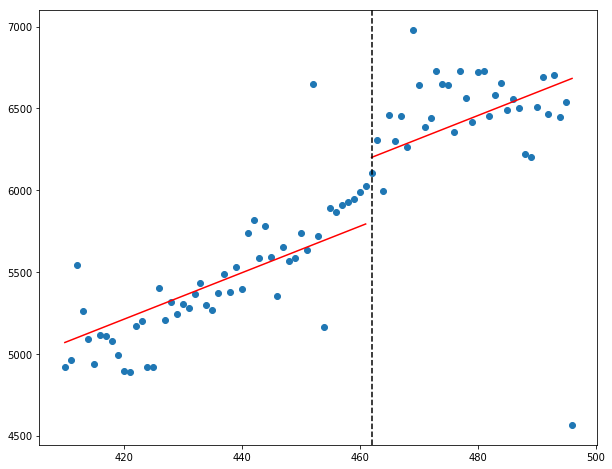

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.14e-24
Time:                        13:05:37   Log-Likelihood:                -627.44
No. Observations:                  87   AIC:                             1261.
Df Residuals:                      84   BIC:                             1268.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1850.8223   1104.355     -1.676      0.0

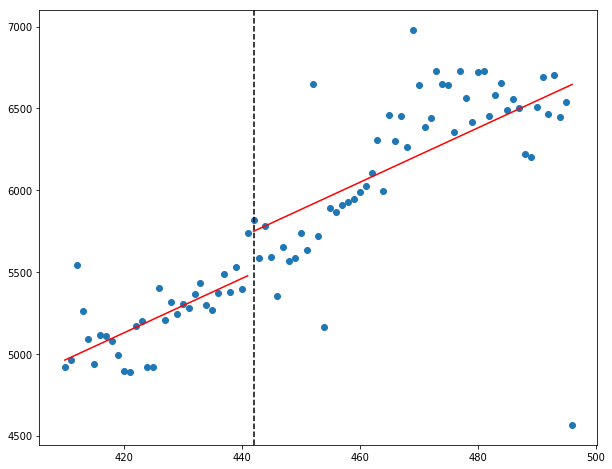

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     133.9
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.44e-27
Time:                        13:05:38   Log-Likelihood:                -620.33
No. Observations:                  87   AIC:                             1247.
Df Residuals:                      84   BIC:                             1254.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5409.9132    732.754     -7.383      0.0

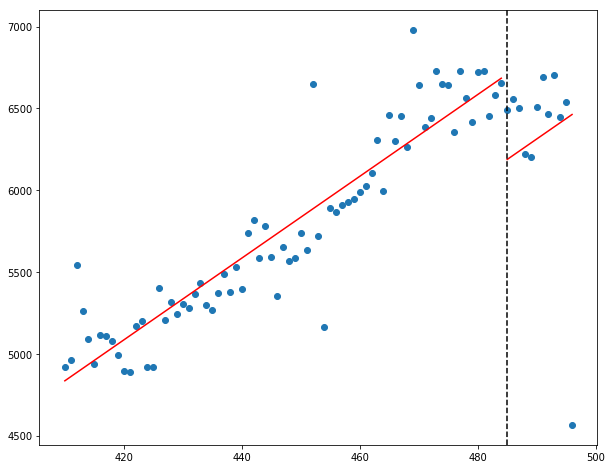

In [29]:
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy', df = df, poly=1, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy1', df = df, poly=1, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy2', df = df, poly=1, discontinuity_point=p2)

Although our discontinuity analysis was significant for num_users, it was also significant for random_point2, which means that we do not consider this to be a causal effect of CARA.

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.34e-23
Time:                        13:04:46   Log-Likelihood:                -702.95
No. Observations:                  87   AIC:                             1412.
Df Residuals:                      84   BIC:                             1419.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -425.8919   2803.163     -0.152      0.8

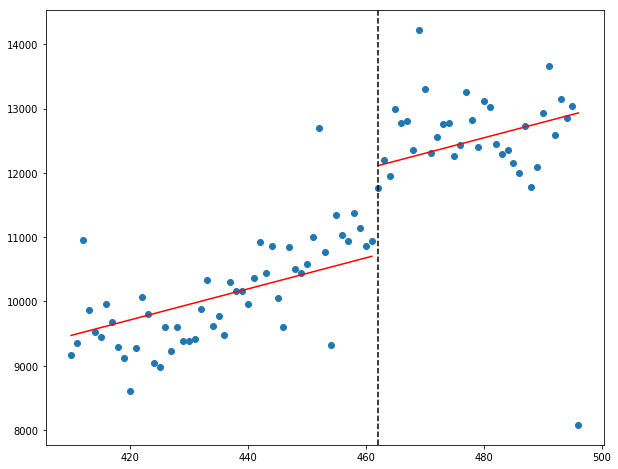

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     84.35
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           8.15e-21
Time:                        13:04:46   Log-Likelihood:                -709.59
No. Observations:                  87   AIC:                             1425.
Df Residuals:                      84   BIC:                             1433.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6097.2993   2839.125     -2.148      0.0

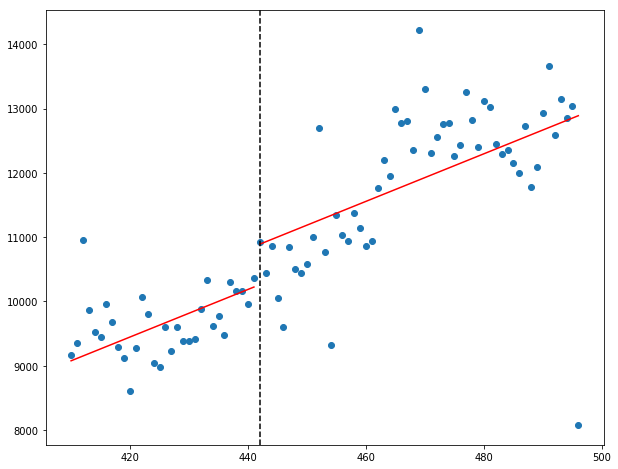

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     95.04
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.69e-22
Time:                        13:04:46   Log-Likelihood:                -706.05
No. Observations:                  87   AIC:                             1418.
Df Residuals:                      84   BIC:                             1426.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.401e+04   1962.902     -7.138      0.0

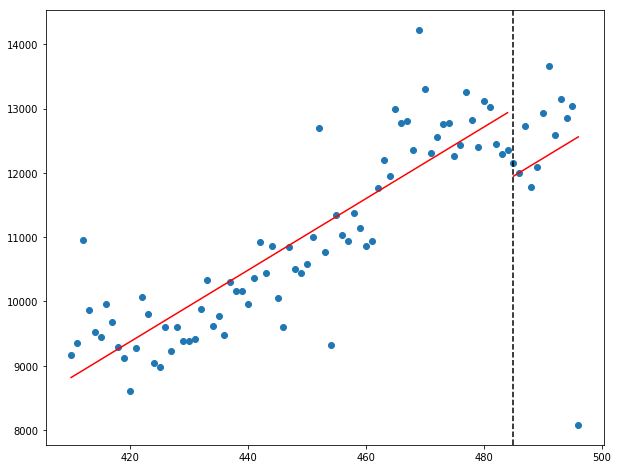

In [28]:
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy', df = df, poly=1, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy1', df = df, poly=1, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy2', df = df, poly=1, discontinuity_point=p2)

We see the same phenomenon above for the number of user connections (edges) in the network. 

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     76.45
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.22e-19
Time:                        13:13:54   Log-Likelihood:                 769.20
No. Observations:                  87   AIC:                            -1532.
Df Residuals:                      84   BIC:                            -1525.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0015      0.000     12.091      0.0

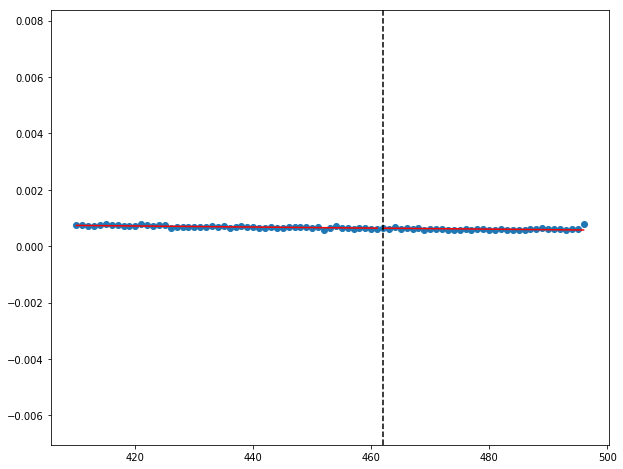

In [33]:
regression_discontinuity(x = 'week', y = 'density', dummy = 'dummy', df = df, poly=1, discontinuity_point=policy_date)

Density of the network is not significant at our policy date. No causal relationship.

                             OLS Regression Results                            
Dep. Variable:     avg_clustering_coef   R-squared:                       0.056
Model:                             OLS   Adj. R-squared:                  0.034
Method:                  Least Squares   F-statistic:                     2.500
Date:                 Wed, 10 Apr 2019   Prob (F-statistic):             0.0882
Time:                         13:13:14   Log-Likelihood:                 365.81
No. Observations:                   87   AIC:                            -725.6
Df Residuals:                       84   BIC:                            -718.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0405      0.013      3.12

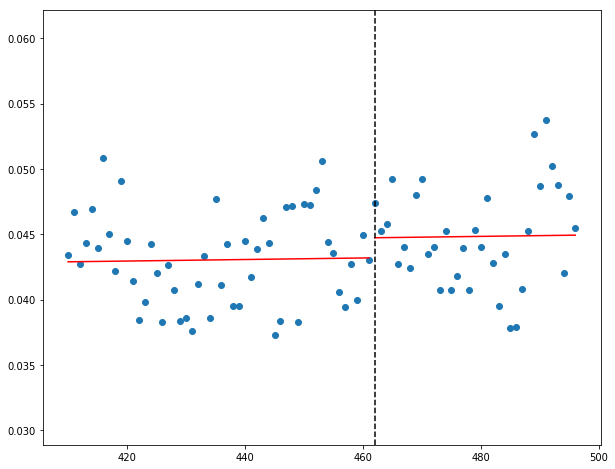

In [32]:
regression_discontinuity(x = 'week', y = 'avg_clustering_coef', dummy = 'dummy', df = df, poly=1, discontinuity_point=policy_date)

Average clustering coefficient of the network is not significant at our policy date. No causal relationship.

                            OLS Regression Results                            
Dep. Variable:          cons_per_user   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     24.80
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.43e-09
Time:                        13:19:32   Log-Likelihood:                 128.31
No. Observations:                  87   AIC:                            -250.6
Df Residuals:                      84   BIC:                            -243.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0433      0.199     10.286      0.0

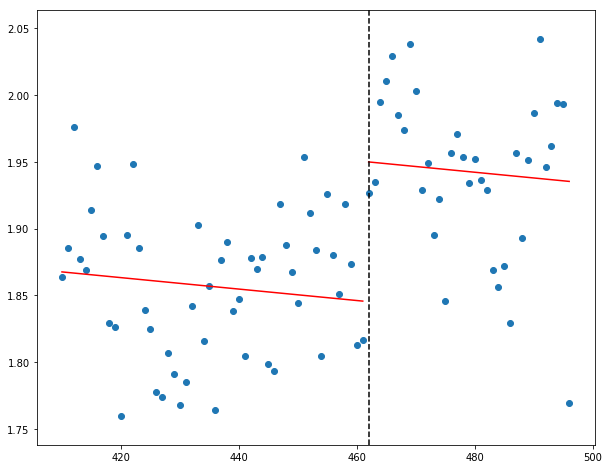

                            OLS Regression Results                            
Dep. Variable:          cons_per_user   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     12.91
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.29e-05
Time:                        13:19:33   Log-Likelihood:                 119.79
No. Observations:                  87   AIC:                            -233.6
Df Residuals:                      84   BIC:                            -226.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5081      0.206      7.335      0.0

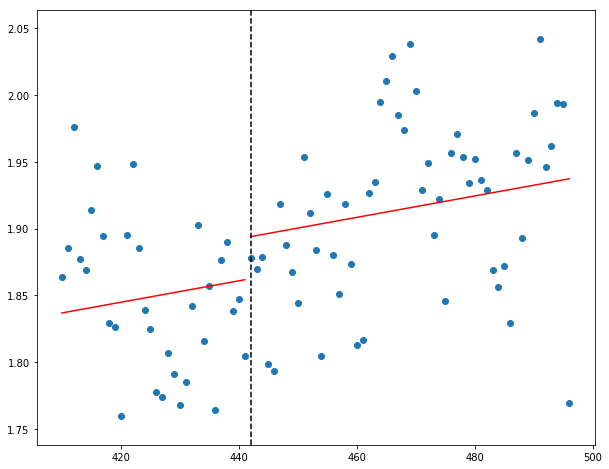

                            OLS Regression Results                            
Dep. Variable:          cons_per_user   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     12.09
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.43e-05
Time:                        13:19:33   Log-Likelihood:                 119.13
No. Observations:                  87   AIC:                            -232.3
Df Residuals:                      84   BIC:                            -224.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2528      0.149      8.398      0.0

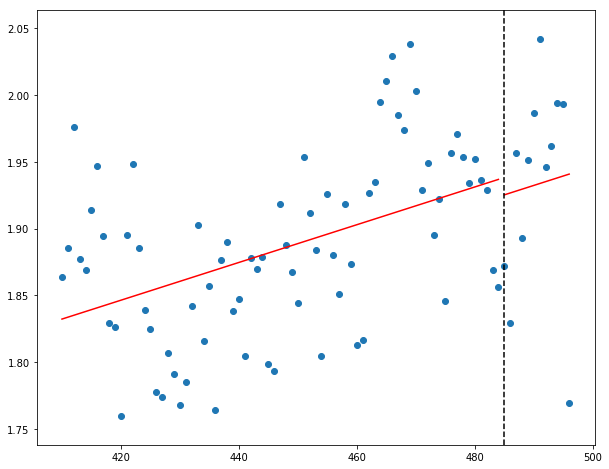

In [35]:
regression_discontinuity(x = 'week', y = 'cons_per_user', dummy = 'dummy', df = df, poly=1, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'cons_per_user', dummy = 'dummy1', df = df, poly=1, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'cons_per_user', dummy = 'dummy2', df = df, poly=1, discontinuity_point=p2)

Number of connections per user (average degree) is significant at our policy date but is not significant at either random point, which suggests a causal relationship.

                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     7.458
Date:                Wed, 10 Apr 2019   Prob (F-statistic):            0.00104
Time:                        13:33:37   Log-Likelihood:                 437.61
No. Observations:                  87   AIC:                            -869.2
Df Residuals:                      84   BIC:                            -861.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.006      6.320      0.0

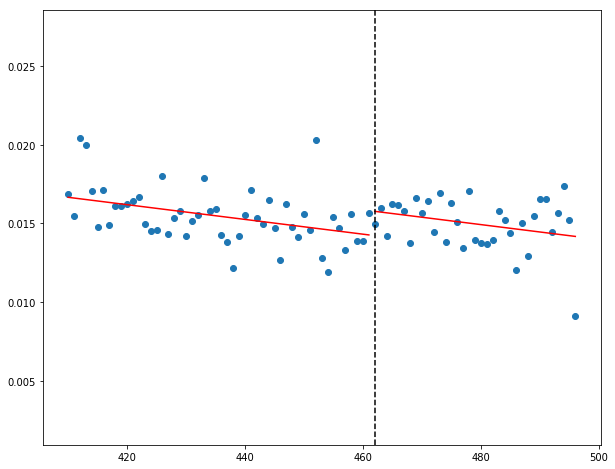

                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.486
Date:                Wed, 10 Apr 2019   Prob (F-statistic):             0.0141
Time:                        13:33:38   Log-Likelihood:                 434.91
No. Observations:                  87   AIC:                            -863.8
Df Residuals:                      84   BIC:                            -856.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0248      0.005      4.521      0.0

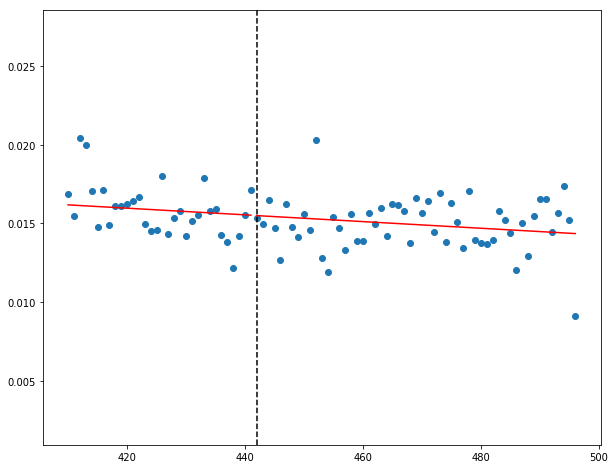

                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4.525
Date:                Wed, 10 Apr 2019   Prob (F-statistic):             0.0136
Time:                        13:33:38   Log-Likelihood:                 434.95
No. Observations:                  87   AIC:                            -863.9
Df Residuals:                      84   BIC:                            -856.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0255      0.004      6.447      0.0

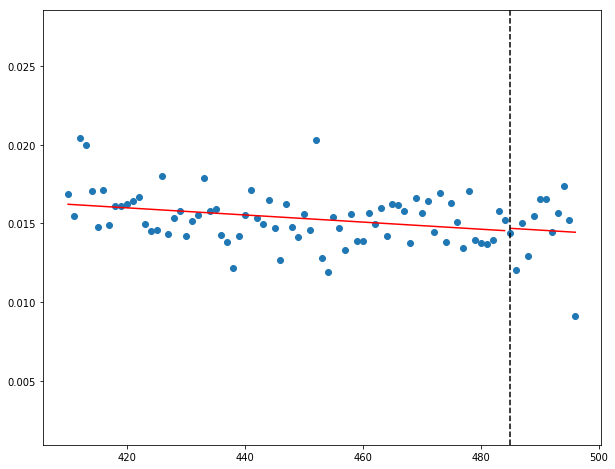

In [40]:
regression_discontinuity(x = 'week', y = 'proportion', dummy = 'dummy', df = df2, poly=1, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'proportion', dummy = 'dummy1', df = df2, poly=1, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'proportion', dummy = 'dummy2', df = df2, poly=1, discontinuity_point=p2)

The proportion of newcomers per week is significant at our policy date but not at our random points, which indicates causal relationship.

### Because num_users and num_connections increase considerably over time, we use regression discontinuity with a squared term as well.

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     97.60
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.92e-27
Time:                        13:28:08   Log-Likelihood:                -616.94
No. Observations:                  87   AIC:                             1242.
Df Residuals:                      83   BIC:                             1252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.138e+04   1.23e+04     -4.170   

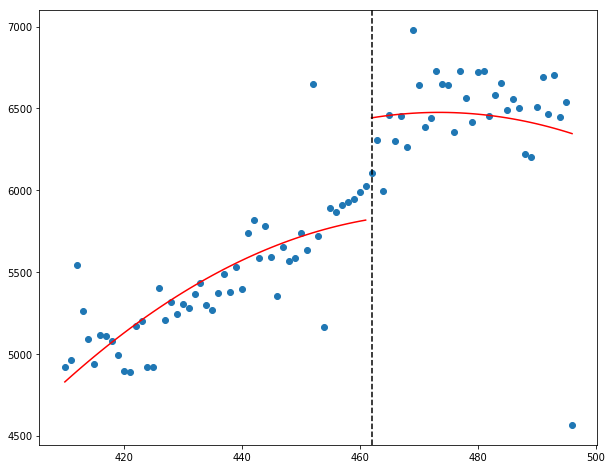

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     73.22
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.02e-23
Time:                        13:28:08   Log-Likelihood:                -626.36
No. Observations:                  87   AIC:                             1261.
Df Residuals:                      83   BIC:                             1271.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.441e+04   1.57e+04     -1.558   

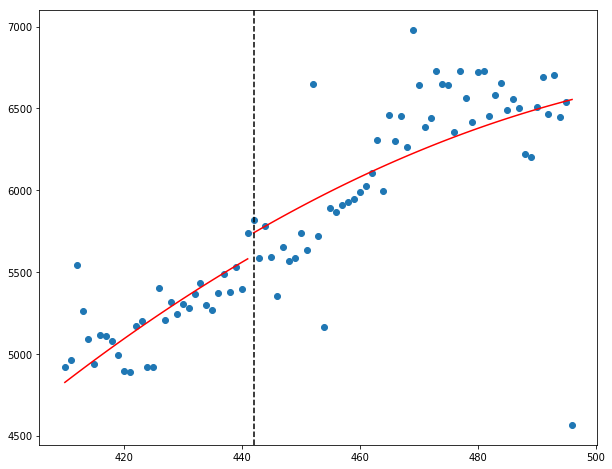

                            OLS Regression Results                            
Dep. Variable:              num_users   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     89.37
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           6.51e-26
Time:                        13:28:09   Log-Likelihood:                -619.90
No. Observations:                  87   AIC:                             1248.
Df Residuals:                      83   BIC:                             1258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9328.0267   1.63e+04      0.573   

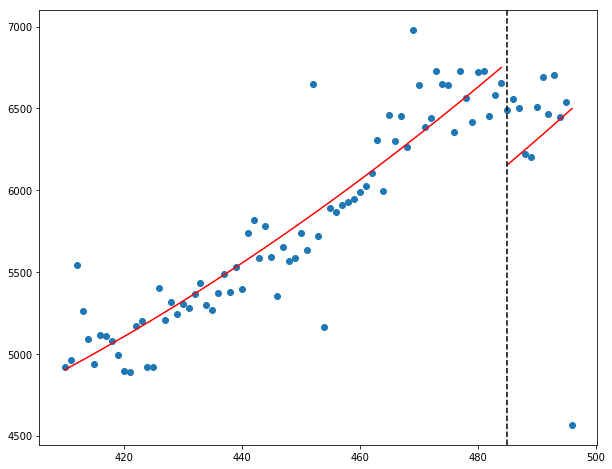

In [36]:
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy', df = df, poly=2, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy1', df = df, poly=2, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'num_users', dummy = 'dummy2', df = df, poly=2, discontinuity_point=p2)

With a squared term, there is a significant effect of our dummy variable at our policy date, but there is also an effect on one of our random points. Thus we cannot conclude that there is a causal relationship between the policy and this metric.

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     81.68
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.08e-24
Time:                        13:30:23   Log-Likelihood:                -697.71
No. Observations:                  87   AIC:                             1403.
Df Residuals:                      83   BIC:                             1413.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.017e+05   3.12e+04     -3.260   

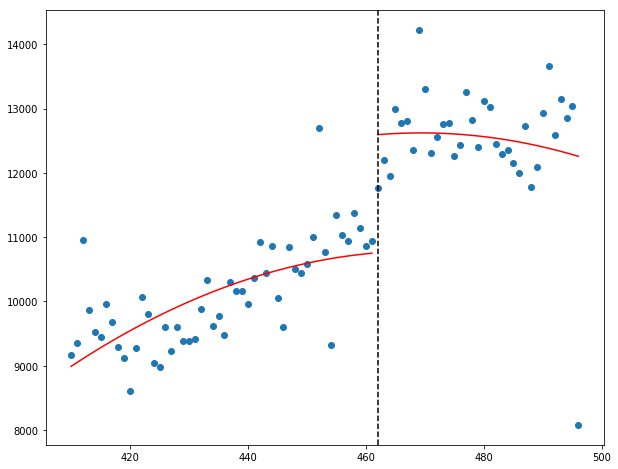

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     55.57
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           8.47e-20
Time:                        13:30:23   Log-Likelihood:                -709.58
No. Observations:                  87   AIC:                             1427.
Df Residuals:                      83   BIC:                             1437.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.033e+04   4.08e+04     -0.253   

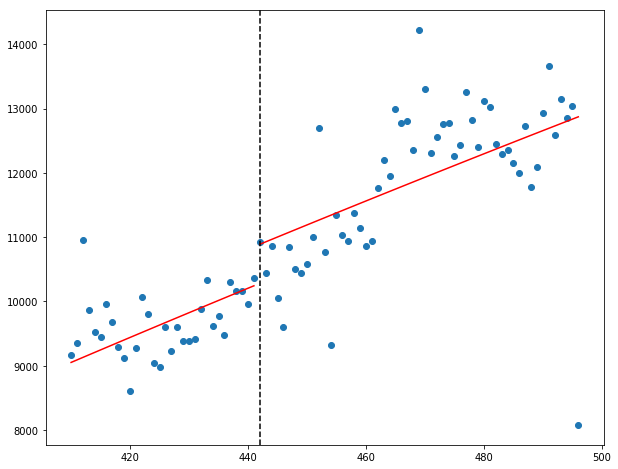

                            OLS Regression Results                            
Dep. Variable:        num_connections   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     65.72
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.33e-22
Time:                        13:30:23   Log-Likelihood:                -704.58
No. Observations:                  87   AIC:                             1417.
Df Residuals:                      83   BIC:                             1427.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.894e+04   4.31e+04      1.367   

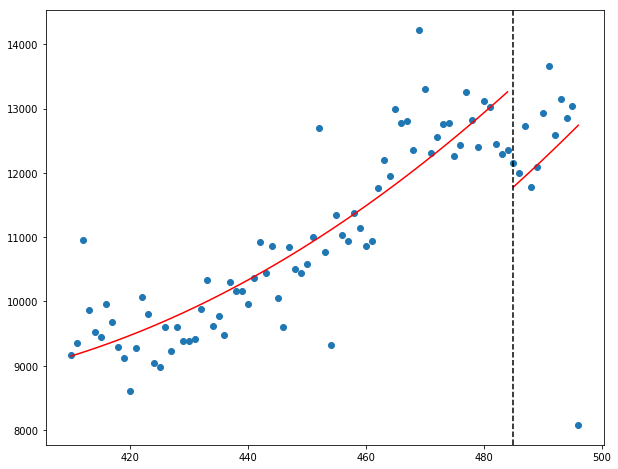

In [38]:
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy', df = df, poly=2, discontinuity_point=policy_date)
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy1', df = df, poly=2, discontinuity_point=p1)
regression_discontinuity(x = 'week', y = 'num_connections', dummy = 'dummy2', df = df, poly=2, discontinuity_point=p2)

Although num_connections is significant with the squared term at our policy date, this is also true at random_point2. We do not assume a causal relationship here.